In [ ]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

df= pd.read_csv("/content/heart_failure_clinical_records_dataset.csv")
df


,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280,0


In [ ]:
df.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [ ]:
print(df.isnull().sum())

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64


In [ ]:
print(df.duplicated().sum())

0


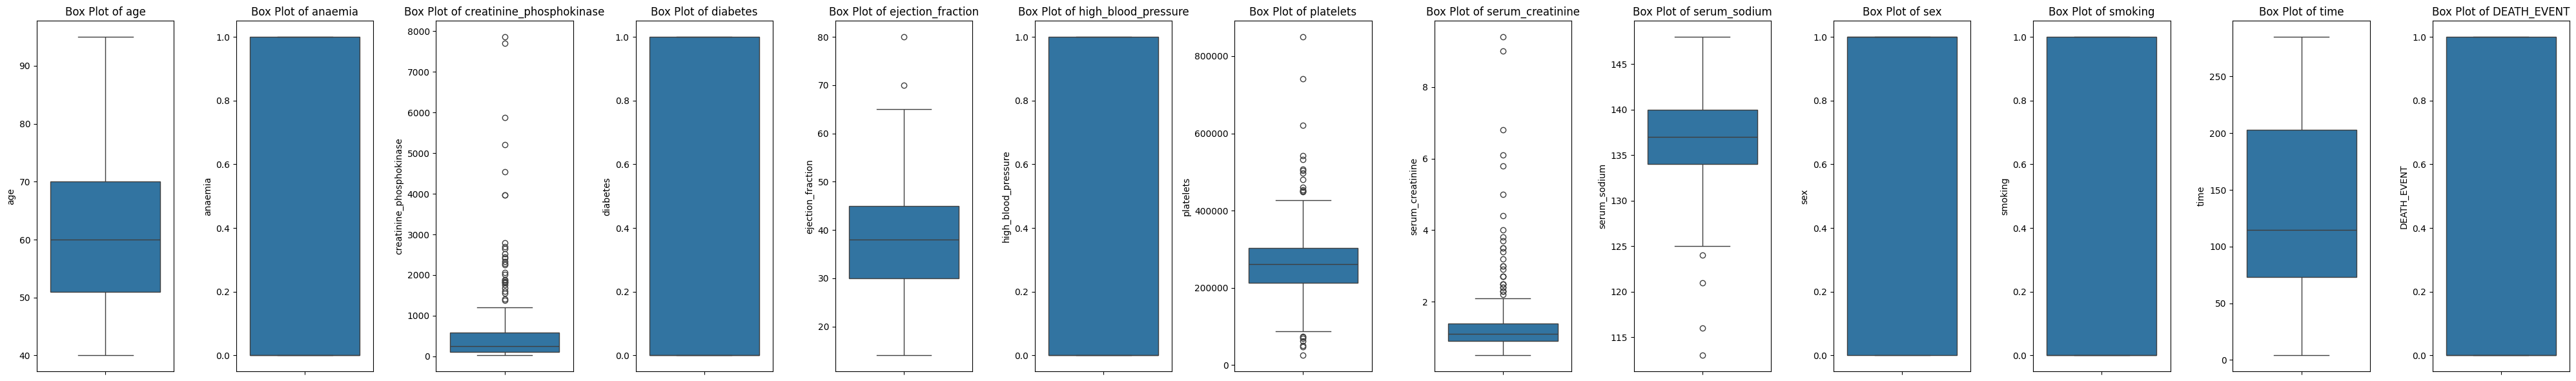

In [ ]:
columns = ['age',	'anaemia',	'creatinine_phosphokinase',	'diabetes',	'ejection_fraction',	'high_blood_pressure',	'platelets',	'serum_creatinine',	'serum_sodium',	'sex',	'smoking',	'time',	'DEATH_EVENT']

plt.figure(figsize=(40, 6))
for i, col in enumerate(columns, 1):
    plt.subplot(1, 13, i)
    sns.boxplot(df[col])
    plt.title(f'Box Plot of {col}')

plt.tight_layout()
plt.show()

In [ ]:
columns = [	' creatinine_phosphokinase  ','ejection_fraction','platelets',	'serum_creatinine',	'serum_sodium ']
for _ in range(3):  # Repeat the process 3 times
    for col in columns:
        if col in df.columns:
            # Calculate IQR for the column
            Q1 = df[col].quantile(0.25)
            Q3 = df[col].quantile(0.75)
            IQR = Q3 - Q1
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR

            # Mark outliers
            df[col + '_outlier'] = df[col].apply(lambda x: x < lower_bound or x > upper_bound)

            # Count and print the number of outliers
            print(f"Number of outliers in {col}: {df[col + '_outlier'].sum()}")

    # Create a copy of the DataFrame excluding rows with outliers
    df_cleaned = df[~df[[col + '_outlier' for col in columns if col in df.columns]].any(axis=1)].copy()

    # Update the original DataFrame for the next iteration
    df = df_cleaned.copy()

    # Print the number of rows after each iteration
    print(f"Number of rows after dropping outliers (round {_ + 1}): {df_cleaned.shape[0]}")

# Final cleaned DataFrame after 3 iterations
df_cleaned = df.copy()

Number of outliers in ejection_fraction: 2
Number of outliers in platelets: 21
Number of outliers in serum_creatinine: 29
Number of rows after dropping outliers (round 1): 251
Number of outliers in ejection_fraction: 0
Number of outliers in platelets: 3
Number of outliers in serum_creatinine: 21
Number of rows after dropping outliers (round 2): 228
Number of outliers in ejection_fraction: 0
Number of outliers in platelets: 0
Number of outliers in serum_creatinine: 7
Number of rows after dropping outliers (round 3): 221


In [ ]:
df=df_cleaned
df

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT,ejection_fraction_outlier,platelets_outlier,serum_creatinine_outlier
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1,False,False,False
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1,False,False,False
6,75.0,1,246,0,15,0,127000.00,1.2,137,1,0,10,1,False,False,False
8,65.0,0,157,0,65,0,263358.03,1.5,138,0,0,10,1,False,False,False
11,62.0,0,231,0,25,1,253000.00,0.9,140,1,1,10,1,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
293,63.0,1,103,1,35,0,179000.00,0.9,136,1,1,270,0,False,False,False
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270,0,False,False,False
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271,0,False,False,False
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280,0,False,False,False


In [ ]:
df=df.drop(['ejection_fraction_outlier','platelets_outlier','serum_creatinine_outlier'],axis=1)
df

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
6,75.0,1,246,0,15,0,127000.00,1.2,137,1,0,10,1
8,65.0,0,157,0,65,0,263358.03,1.5,138,0,0,10,1
11,62.0,0,231,0,25,1,253000.00,0.9,140,1,1,10,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
293,63.0,1,103,1,35,0,179000.00,0.9,136,1,1,270,0
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271,0
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280,0


In [ ]:
from sklearn.preprocessing import StandardScaler

# Separate features and target variable
X = df.drop(columns=['DEATH_EVENT'])
y = df['DEATH_EVENT']

# Apply standardization
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Create a DataFrame with the scaled features
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)


In [ ]:
X_scaled_df

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time
0,-0.395512,-0.892607,6.864416,-0.844499,-0.059450,-0.775532,0.126635,0.267387,-0.331808,0.731247,-0.716728,-1.743359
1,0.478278,-0.892607,-0.434835,-0.844499,-1.615321,-0.775532,-1.389156,1.166134,-2.232945,0.731247,1.395230,-1.729972
2,1.352068,1.120313,-0.340223,-0.844499,-2.047507,-0.775532,-1.912575,0.716760,-0.060217,0.731247,-0.716728,-1.689812
3,0.478278,-0.892607,-0.424427,-0.844499,2.274356,-0.775532,0.126635,2.064880,0.211374,-1.367527,-0.716728,-1.689812
4,0.216141,-0.892607,-0.354415,-0.844499,-1.183135,1.289438,-0.028267,-0.631359,0.754556,0.731247,1.395230,-1.689812
...,...,...,...,...,...,...,...,...,...,...,...,...
216,0.303520,1.120313,-0.475517,1.184134,-0.318762,-0.775532,-1.134924,-0.631359,-0.331808,0.731247,1.395230,1.790727
217,0.216141,-0.892607,-0.515254,1.184134,-0.059450,1.289438,-1.493840,0.267387,1.569329,0.731247,1.395230,1.790727
218,-0.395512,-0.892607,1.148956,-0.844499,-0.059450,-0.775532,0.225965,0.716760,0.482965,-1.367527,-0.716728,1.804114
219,-1.269302,-0.892607,1.710000,-0.844499,-0.059450,-0.775532,-1.718163,1.615507,0.754556,0.731247,1.395230,1.924594


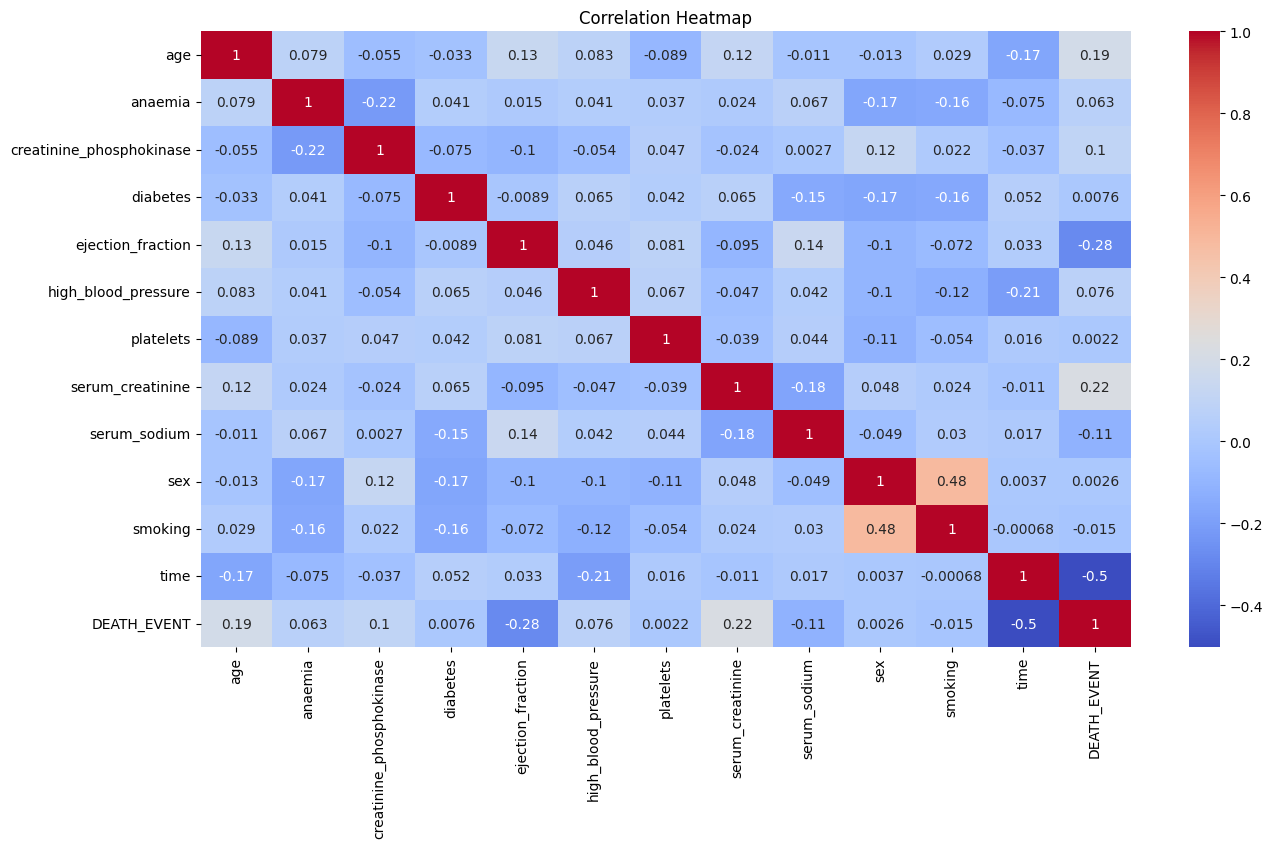

In [ ]:
columns = df[['age',	'anaemia',	'creatinine_phosphokinase',	'diabetes',	'ejection_fraction',	'high_blood_pressure',	'platelets',	'serum_creatinine',	'serum_sodium',	'sex',	'smoking',	'time',	'DEATH_EVENT']].corr()
plt.figure(figsize=(15, 8))
sns.heatmap(columns, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()



In [ ]:
# Check the distribution of the target variable
df['DEATH_EVENT'].value_counts(normalize=True)

,proportion
DEATH_EVENT,
0,0.764706
1,0.235294


In [ ]:
# Apply SMOTE to balance the dataset
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_scaled, y)

In [ ]:
# Create DataFrame with the resampled features
X_resampled_df = pd.DataFrame(X_resampled, columns=X.columns)
y_resampled_df = pd.Series(y_resampled)

# Concatenate the resampled features and target variable
df_resampled = pd.concat([X_resampled_df, y_resampled_df], axis=1)

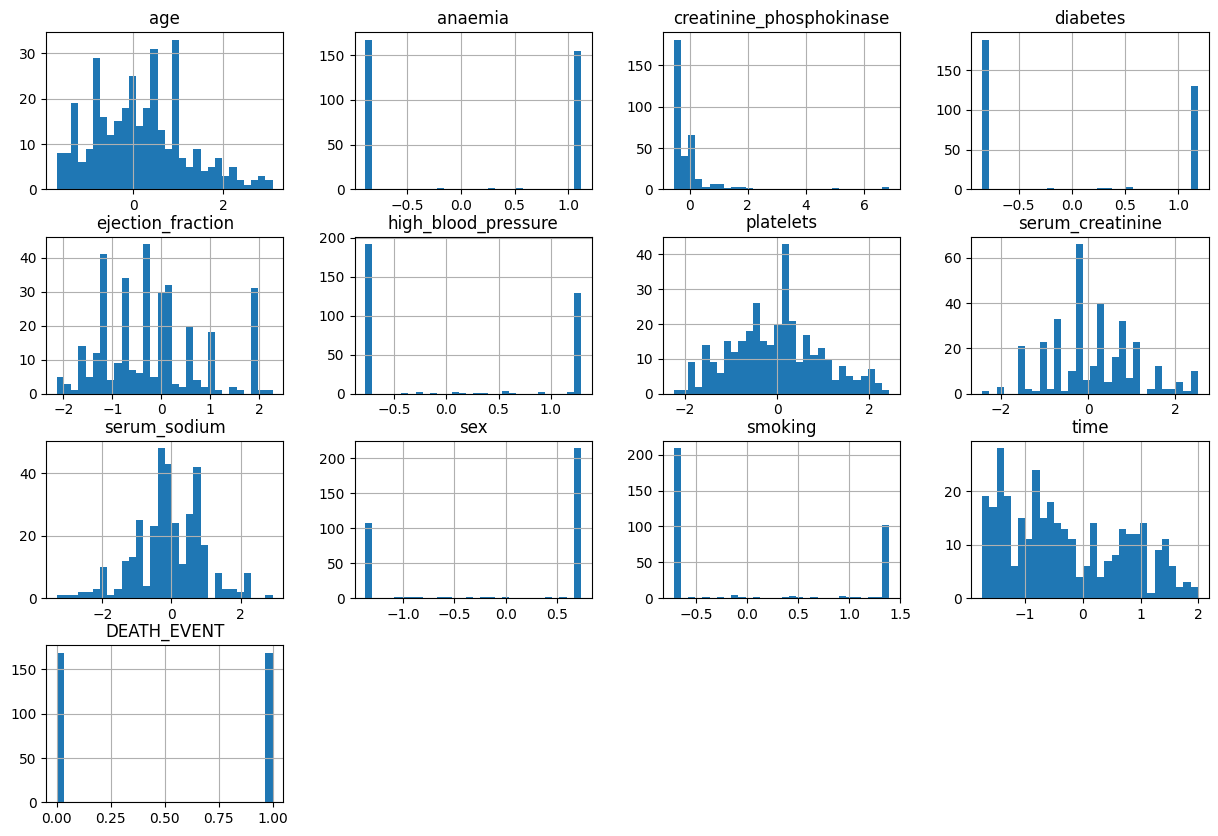

              age     anaemia  creatinine_phosphokinase    diabetes  \
count  338.000000  338.000000                338.000000  338.000000   
mean     0.149610    0.077737                  0.014120    0.003023   
std      1.028983    0.987125                  1.048694    0.977406   
min     -1.706197   -0.892607                 -0.544583   -0.844499   
25%     -0.695321   -0.892607                 -0.450860   -0.844499   
50%      0.095425   -0.479214                 -0.336912   -0.844499   
75%      0.915173    1.120313                 -0.022330    1.184134   
max      3.099647    1.120313                  6.864416    1.184134   

       ejection_fraction  high_blood_pressure   platelets  serum_creatinine  \
count         338.000000           338.000000  338.000000        338.000000   
mean           -0.199516             0.070238   -0.022616          0.118454   
std             1.002886             0.996344    0.966213          0.966513   
min            -2.133945            -0.77553

In [ ]:
# Plot histograms to check distribution
df_resampled.hist(bins=30, figsize=(15, 10))
plt.show()

# Check summary statistics
print(df_resampled.describe())


In [ ]:
X = df_resampled.drop('DEATH_EVENT', axis=1)
y = df_resampled['DEATH_EVENT']

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [ ]:
from sklearn.svm import SVC

svm_model = SVC(kernel='rbf')  # You can also try 'rbf', 'poly', etc.
svm_model.fit(X_train, y_train)


SVC()

In [ ]:
y_pred = svm_model.predict(X_test)
print(y_pred)


[1 1 0 1 0 0 0 1 0 0 0 1 1 0 0 1 0 0 0 1 1 1 1 0 0 1 0 0 0 1 0 1 0 1 1 0 1
 1 0 0 1 0 0 0 1 0 0 1 1 0 0 1 1 1 0 0 1 1 1 1 0 0 0 1 1 1 1 0 1 1 0 1 1 1
 0 1 1 0 1 0 0 1 1 0 0 0 1 0 0 0 0 1 0 0 0 0 1 1 0 1 0 0]


In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))


0.8627450980392157
              precision    recall  f1-score   support

           0       0.89      0.86      0.87        56
           1       0.83      0.87      0.85        46

    accuracy                           0.86       102
   macro avg       0.86      0.86      0.86       102
weighted avg       0.86      0.86      0.86       102

[[48  8]
 [ 6 40]]


In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf'], 'gamma': [0.1, 0.01, 0.001]}
grid = GridSearchCV(SVC(), param_grid, refit=True, verbose=3)
grid.fit(X_train, y_train)

print(grid.best_params_)


Fitting 5 folds for each of 18 candidates, totalling 90 fits
[CV 1/5] END ...C=0.1, gamma=0.1, kernel=linear;, score=0.854 total time=   0.0s
[CV 2/5] END ...C=0.1, gamma=0.1, kernel=linear;, score=0.872 total time=   0.0s
[CV 3/5] END ...C=0.1, gamma=0.1, kernel=linear;, score=0.830 total time=   0.0s
[CV 4/5] END ...C=0.1, gamma=0.1, kernel=linear;, score=0.894 total time=   0.0s
[CV 5/5] END ...C=0.1, gamma=0.1, kernel=linear;, score=0.872 total time=   0.0s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.688 total time=   0.0s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.787 total time=   0.0s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.745 total time=   0.0s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.723 total time=   0.0s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.702 total time=   0.0s
[CV 1/5] END ..C=0.1, gamma=0.01, kernel=linear;, score=0.854 total time=   0.0s
[CV 2/5] END ..C=0.1, gamma=0.01, kernel=linear;

Accuracy Score: 0.8627450980392157

Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.86      0.87        56
           1       0.83      0.87      0.85        46

    accuracy                           0.86       102
   macro avg       0.86      0.86      0.86       102
weighted avg       0.86      0.86      0.86       102

Confusion Matrix:
 [[48  8]
 [ 6 40]]


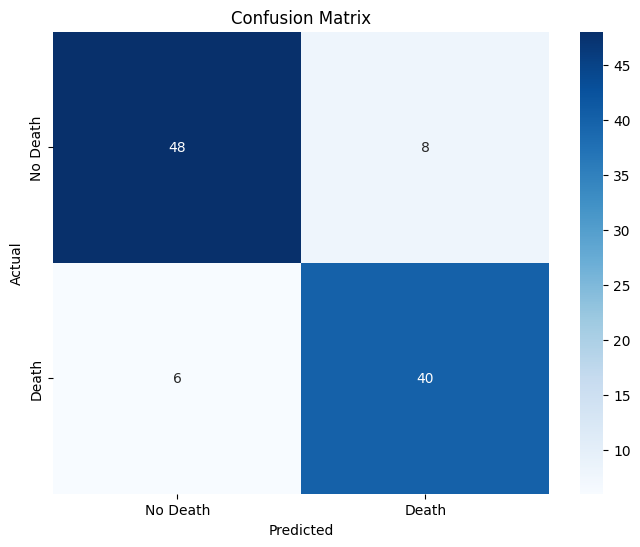

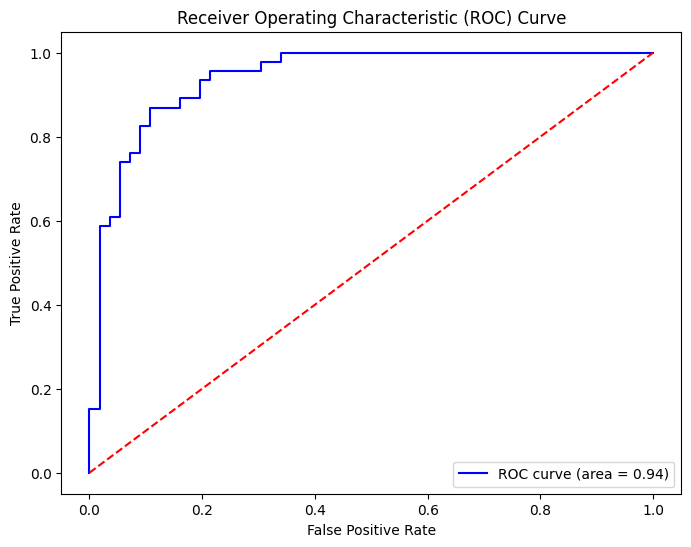

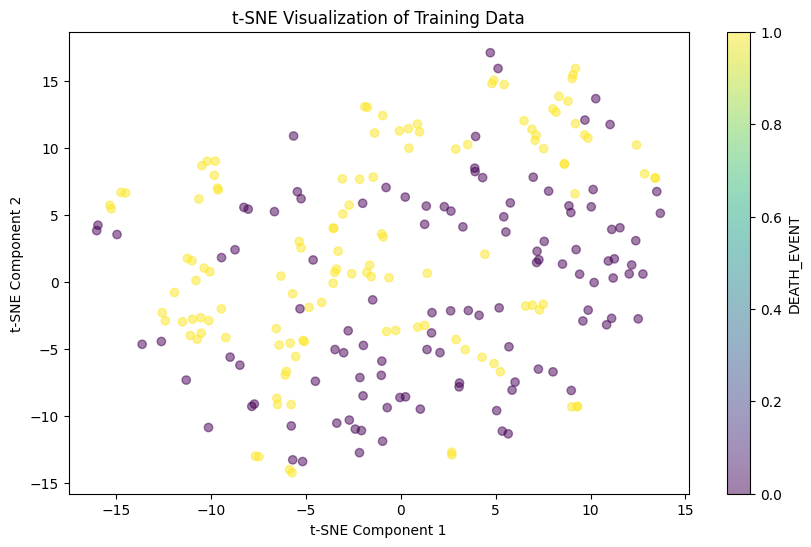

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc
from sklearn.manifold import TSNE

# Assuming df_resampled is already defined
X = df_resampled.drop('DEATH_EVENT', axis=1)
y = df_resampled['DEATH_EVENT']

# Step 1: Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Step 2: Train the SVM model
svm_model = SVC(kernel='rbf', probability=True)  # probability=True for ROC curve
svm_model.fit(X_train, y_train)

# Step 3: Make predictions
y_pred = svm_model.predict(X_test)

# Step 4: Print metrics
print("Accuracy Score:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Step 5: Plotting Confusion Matrix
plt.figure(figsize=(8, 6))
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No Death', 'Death'], yticklabels=['No Death', 'Death'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Step 6: ROC Curve
y_prob = svm_model.predict_proba(X_test)[:, 1]  # Probability estimates for the positive class
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# Step 7: t-SNE Visualization
tsne = TSNE(n_components=2, random_state=42)
X_train_tsne = tsne.fit_transform(X_train)

plt.figure(figsize=(10, 6))
scatter = plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1], c=y_train, cmap='viridis', alpha=0.5)
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.title('t-SNE Visualization of Training Data')
plt.colorbar(scatter, label='DEATH_EVENT')
plt.show()

# Optional: Feature importance visualization for linear kernel (if applicable)
if svm_model.kernel == 'linear':
    feature_importance = np.abs(svm_model.coef_[0])
    plt.figure(figsize=(12, 6))
    sns.barplot(x=feature_importance, y=X.columns)
    plt.title('Feature Importance (Absolute Coefficients)')
    plt.show()


In [ ]:
'''
from sklearn.inspection import plot_partial_dependence

# Plot partial dependence for top two features
plot_partial_dependence(svm_model, X_train, features=[0, 1], grid_resolution=50)
plt.show()
'''
!pip install shap

In [ ]:
!pip install -U scikit-learn


In [ ]:
from sklearn.inspection import permutation_importance

# Get feature importance using permutation importance
result = permutation_importance(svm_model, X_test, y_test, n_repeats=10, random_state=42)

# Display feature importance
for i in result.importances_mean.argsort()[::-1]:
    print(f"Feature {i}: {result.importances_mean[i]:.3f}")


Feature 11: 0.160
Feature 4: 0.075
Feature 7: 0.059
Feature 1: 0.036
Feature 6: 0.036
Feature 0: 0.036
Feature 8: 0.024
Feature 9: 0.021
Feature 2: 0.015
Feature 3: 0.006
Feature 10: 0.002
Feature 5: 0.001


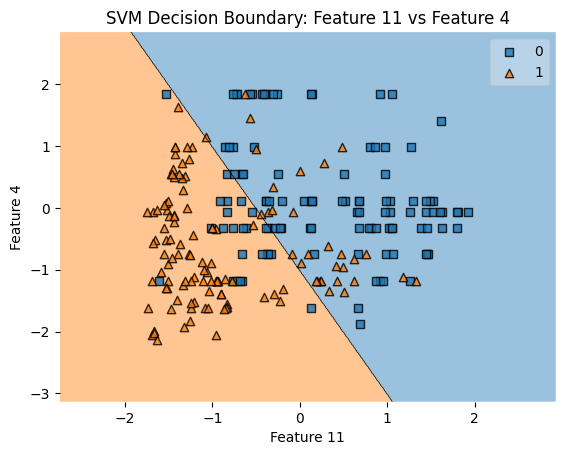

In [ ]:
X_train_2D = X_train[[X_train.columns[11], X_train.columns[4]]].values
svm_model_2D.fit(X_train_2D, y_train)

# Plot the decision boundary
plot_decision_regions(X_train_2D, y_train.values, clf=svm_model_2D)
plt.xlabel('Feature 11')
plt.ylabel('Feature 4')
plt.title('SVM Decision Boundary: Feature 11 vs Feature 4')
plt.show()


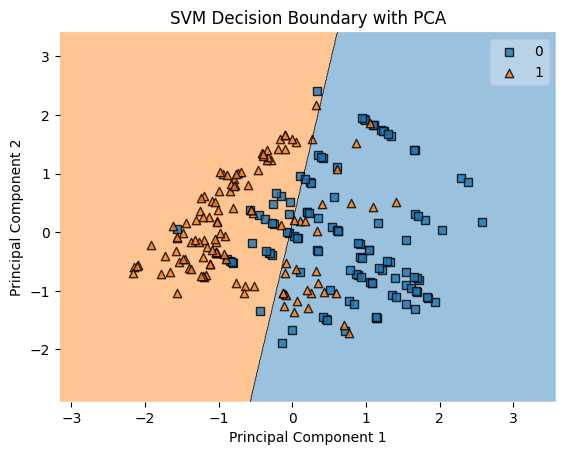

In [ ]:
from sklearn.decomposition import PCA
from sklearn.svm import SVC
import matplotlib.pyplot as plt

# Select the actual data for columns 11 and 4
X_train_selected = X_train.iloc[:, [11, 4]]  # Extract data from columns 11 and 4

# Apply PCA to reduce to 2 components
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_selected)

# Train a new SVM model on the selected features
svm_model_pca = SVC(kernel='linear')  # You can choose your preferred kernel
svm_model_pca.fit(X_train_pca, y_train)

# Plot decision boundary
plot_decision_regions(X_train_pca, y_train.values, clf=svm_model_pca)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('SVM Decision Boundary with PCA')
plt.show()


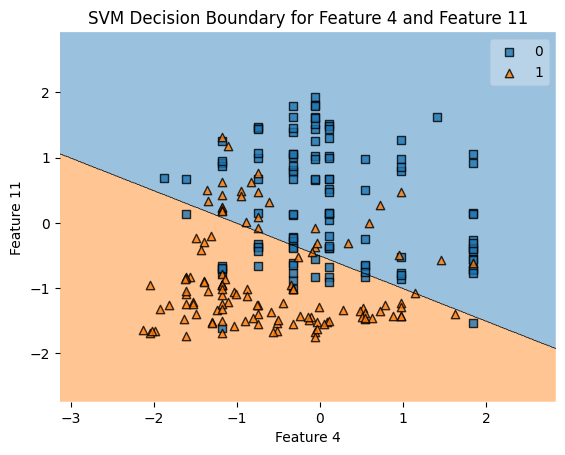

In [ ]:
from sklearn.svm import SVC
from mlxtend.plotting import plot_decision_regions
import matplotlib.pyplot as plt

# Step 1: Select the specific features (Feature 4 and Feature 11)
X_train_selected = X_train.iloc[:, [4, 11]].values  # Extract data from columns 4 and 11

# Step 2: Train the SVM model on these selected features
svm_model = SVC(kernel='linear')  # or use any kernel you prefer
svm_model.fit(X_train_selected, y_train.values)

# Step 3: Plot decision boundary
plot_decision_regions(X_train_selected, y_train.values, clf=svm_model)
plt.xlabel('Feature 4')   # Label for Feature 4
plt.ylabel('Feature 11')  # Label for Feature 11
plt.title('SVM Decision Boundary for Feature 4 and Feature 11')
plt.show()


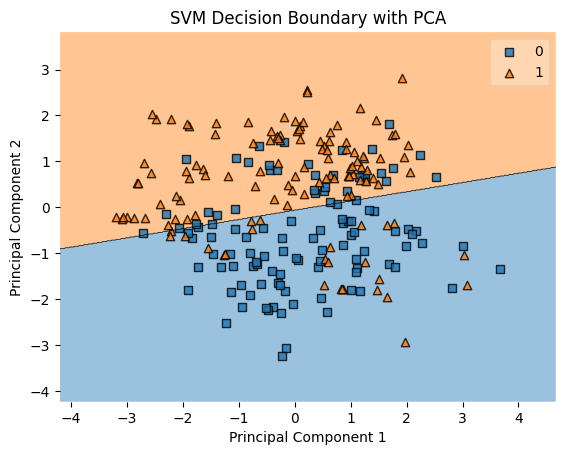

In [ ]:
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from mlxtend.plotting import plot_decision_regions
import matplotlib.pyplot as plt

# Step 1: Apply PCA to reduce the data to 2 components
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)

# Step 2: Train the SVM model on the PCA-transformed dataset
svm_model = SVC(kernel='linear')  # or use any kernel you prefer
svm_model.fit(X_train_pca, y_train.values)  # Fit the model to the PCA-transformed data

# Step 3: Plot decision boundary using PCA-transformed data
plot_decision_regions(X_train_pca, y_train.values, clf=svm_model)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('SVM Decision Boundary with PCA')
plt.show()


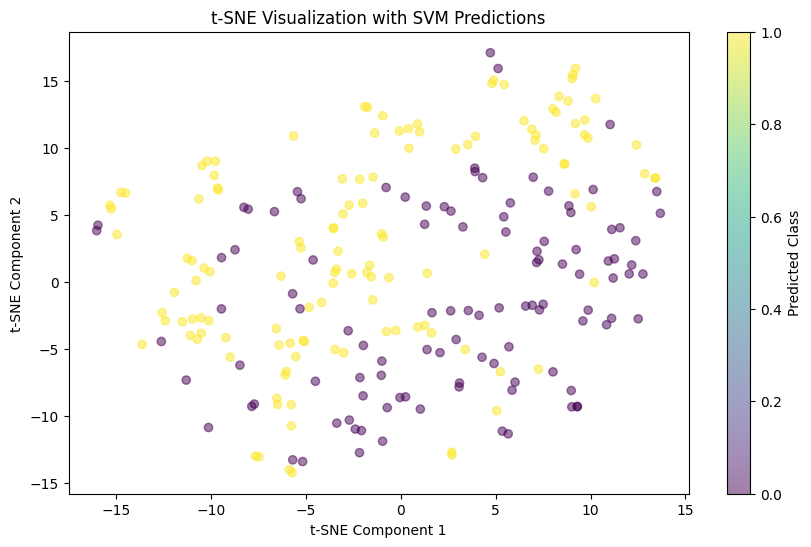

In [ ]:
from sklearn.manifold import TSNE
from sklearn.svm import SVC
from mlxtend.plotting import plot_decision_regions
import matplotlib.pyplot as plt
import numpy as np

# Step 1: Train the SVM model on the original dataset
svm_model = SVC(kernel='linear')  # or use any kernel you prefer
svm_model.fit(X_train, y_train.values)  # Fit the model to the entire training set

# Step 2: Apply t-SNE to reduce the data to 2 dimensions
tsne = TSNE(n_components=2, random_state=42)
X_train_tsne = tsne.fit_transform(X_train)

# Step 3: Use the SVM model to predict labels based on the original training set
y_pred = svm_model.predict(X_train)

# Step 4: Plot the t-SNE results
plt.figure(figsize=(10, 6))
scatter = plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1], c=y_pred, cmap='viridis', alpha=0.5)
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.title('t-SNE Visualization with SVM Predictions')
plt.colorbar(scatter, label='Predicted Class')
plt.show()
